### Mounting the Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os
os.chdir('/content/drive/My Drive/Ml_imp/')

### 1.) Data Preprocessing Continue

In [3]:
# Importing Essential Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv


In [4]:
# Importing The Train & Test Dataset

data_train=pd.read_csv('/content/drive/MyDrive/Ml_imp/Train.csv')
data_test=pd.read_csv('/content/drive/MyDrive/Ml_imp/Test.csv')

In [5]:
# Removing the Id & Delivery_person_id as they are of no use w.r.t prediction

X_test=data_test.iloc[:,2:]

In [6]:
# Dropping Redundant & Date Time Columns as they are not contributing that much Variance 

X_test=X_test.drop('Order_Date', axis=1)
X_test=X_test.drop('Time_Orderd', axis=1)
X_test=X_test.drop('Time_Order_picked', axis=1)
# Dropping Restaurant latitude & logitude as they were the lowest K best Features and also had multicollinearity>0.4

X_test=X_test.drop('Restaurant_latitude',axis=1)
X_test=X_test.drop('Restaurant_longitude',axis=1)

In [7]:
# Extracting the ID's of Test Dataset and will be used to combine with the predcited Y_test

I=data_test.iloc[:,0]
I=list(I)

In [8]:
# Finding the Missing Values

missing_percentage = X_test.isnull().sum()/100
print(missing_percentage)

Delivery_person_Age            4.91
Delivery_person_Ratings        5.07
Delivery_location_latitude     0.00
Delivery_location_longitude    0.00
Weather conditions             1.58
Road_traffic_density           1.54
Vehicle_condition              0.00
Type_of_order                  0.00
Type_of_vehicle                0.00
multiple_deliveries            2.38
Festival                       0.65
City                           3.24
dtype: float64


In [9]:
# Filling Missing values of Numerical Columns with mean & Categorical Column by Mode

X_test['Delivery_person_Age'] = X_test['Delivery_person_Age'].fillna(X_test['Delivery_person_Age'].mean())
X_test['Delivery_person_Ratings'] = X_test['Delivery_person_Ratings'].fillna(X_test['Delivery_person_Ratings'].mean())
X_test['multiple_deliveries'] = X_test['multiple_deliveries'].fillna(X_test['multiple_deliveries'].mean())
X_test['Weather conditions']=X_test['Weather conditions'].fillna(X_test['Weather conditions'].mode()[0])
X_test['Road_traffic_density']=X_test['Road_traffic_density'].fillna(X_test['Road_traffic_density'].mode()[0])
X_test['Festival']=X_test['Festival'].fillna(X_test['Festival'].mode()[0])
X_test['City']=X_test['City'].fillna(X_test['City'].mode()[0])

In [10]:
# Binary Class: Encoding the Festival Column into 0,1

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X_test.iloc[:,10] = le.fit_transform(X_test.iloc[:, 10])

In [11]:
# Multi Class: Encoding these columns by One Hot Encoding 

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [4,5,7,8,11])], remainder='passthrough')
X_test = np.array(ct.fit_transform(X_test))

In [12]:
X_test.shape

(11399, 28)

In [13]:
# Splitting the Data into X(Independant) & Y(Dependant)-- Target Variables
X=data_train.iloc[:,2:-1]
Y=data_train.iloc[:,-1]

In [14]:
# Dropping Redundant & Date Time Columns as they are not contributing that much Variance 

X=X.drop('Order_Date', axis=1)
X=X.drop('Time_Orderd', axis=1)
X=X.drop('Time_Order_picked', axis=1)
# Dropping Restaurant latitude & logitude as they were the lowest K best Features and also had multicollinearity>0.4
X=X.drop('Restaurant_latitude',axis=1)
X=X.drop('Restaurant_longitude',axis=1)

In [15]:
# Finding the Missing Values

missing_percentage = X.isnull().sum()/100
print(missing_percentage)

Delivery_person_Age            18.54
Delivery_person_Ratings        19.08
Delivery_location_latitude      0.00
Delivery_location_longitude     0.00
Weather conditions              6.16
Road_traffic_density            6.01
Vehicle_condition               0.00
Type_of_order                   0.00
Type_of_vehicle                 0.00
multiple_deliveries             9.93
Festival                        2.28
City                           12.00
dtype: float64


In [16]:
# Filling Missing values of Numerical Columns with mean & Categorical Column by Mode

X['Delivery_person_Age'] = X['Delivery_person_Age'].fillna(X['Delivery_person_Age'].mean())
X['Delivery_person_Ratings'] = X['Delivery_person_Ratings'].fillna(X['Delivery_person_Ratings'].mean())
X['multiple_deliveries'] = X['multiple_deliveries'].fillna(X['multiple_deliveries'].mean())
X['Weather conditions']=X['Weather conditions'].fillna(X['Weather conditions'].mode()[0])
X['Road_traffic_density']=X['Road_traffic_density'].fillna(X['Road_traffic_density'].mode()[0])
X['Festival']=X['Festival'].fillna(X['Festival'].mode()[0])
X['City']=X['City'].fillna(X['City'].mode()[0])


In [17]:
# Binary Class: Encoding the Festival Column into 0,1

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X.iloc[:,10] = le.fit_transform(X.iloc[:, 10])

In [18]:
# Multi Class: Encoding these columns by One Hot Encoding 

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [4,5,7,8,11])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [19]:
# Scaling the X & X_test values by Standard_Scaler: Mean=0, Standard Deviation=1

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X= sc_X.fit_transform(X)

# Only Transform on X_test as we do not want to change the values of X_test as it will then give wrong & bad Y_pred Results on Y_test

X_test=sc_X.transform(X_test)

In [20]:
X.size

1276604

### 3. Machine Learning Algorithm Selection:
Supervised ML - Multiple Regression, Decision Trees, Support Vector Machines, Random Forest Regressor, XG Boost Regressor

### 4. Model Building, Evaluation & Prediction

In [ ]:
# 1.) Multiple Regression

# Importing LinearRegression from sklearn
from sklearn.linear_model import LinearRegression

# Creating Regressor Object
regressor = LinearRegression()

# Fitting the Regressor on X,Y
regressor.fit(X,Y)

# Predicting the Test set results
y_pred = regressor.predict(X_test)

In [ ]:
# Convert numpy array results into List

y_pred=list(y_pred)

#### Sample_Submission_File: 11399 X 2

In [ ]:
# Concat the Test Id's with Y_pred

df=pd.DataFrame(list(zip(I,y_pred)))
df.columns=['ID','Time_taken (min)']
df.to_csv("MR.csv")

In [ ]:
# Doing K-Cross Validation to reduce Overfitting & get lowest Mse Value

from sklearn.model_selection import cross_val_score
mse=cross_val_score(regressor,X,Y,scoring='neg_mean_squared_error',cv=10)
np.mean(mse)

In [ ]:
# 2.) Ridge Regression

# Importing Ridge & GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
ridge_regressor=Ridge()

#### -- Hyper Parameter Tuning -  Grid Search Cv -- ON Alpha as the only Parameter

In [ ]:
# Defing K:v Pair of Alpha
parameters={'alpha':[1,2,5,10,20,30,40,50,60,70,80,90,100]}

# Using Grid Search Cv with Cv=10 cross-validations
ridgecv=GridSearchCV(ridge_regressor,parameters,scoring='neg_mean_squared_error',cv=10)
ridgecv.fit(X,Y)

In [ ]:
print("The Best Parameter value is:{}, Best Score is:{}".format(ridgecv.best_params_,ridgecv.best_score_))

In [ ]:
y_pred_2=ridgecv.predict(X_test)
y_pred_2 = list(y_pred_2)

In [ ]:
# Concat the Test Id's with Y_pred

df=pd.DataFrame(list(zip(I,y_pred_2)))
df.columns=['ID','Time_taken (min)']
df.to_csv("Ridge_R.csv")

In [ ]:
# 3.) Lasso Regression

from sklearn.linear_model import Lasso
lasso_regressor=Lasso()
parameters={'alpha':[1,2,5,10,20,30,40,50,60,70,80,90,100]}
lassocv=GridSearchCV(lasso_regressor,parameters,scoring='neg_mean_squared_error',cv=10)
lassocv.fit(X,Y)

In [ ]:
print("The Best Parameter value is:{}, Best Score is:{}".format(lassocv.best_params_,lassocv.best_score_))

In [ ]:
y_pred_3=lassocv.predict(X_test)
y_pred_3 = list(y_pred_3)

In [ ]:
# Concat the Test Id's with Y_pred

df=pd.DataFrame(list(zip(I,y_pred_3)))
df.columns=['ID','Time_taken (min)']
df.to_csv("Lasso_R.csv")

In [53]:
# 4.) SVR(Support Vector Regressor)

from sklearn.svm import SVR
svm_regressor = SVR(kernel = 'rbf')
svm_regressor.fit(X, Y)


SVR()

In [55]:
y_pred_4=svm_regressor.predict(X_test)
y_pred_4=list(y_pred_4)

In [71]:
# Doing K-Cross Validation to reduce Overfitting & get lowest Mse Value

from sklearn.model_selection import cross_val_score
mse=cross_val_score(svm_regressor,X,Y,scoring='neg_mean_squared_error',cv=10)
np.mean(mse)

-30.67270637660721

In [64]:
# 5.) Random Forest Regressor

from sklearn.ensemble import RandomForestRegressor
regressor_1 = RandomForestRegressor(n_estimators=500,max_features=28,random_state=22)
regressor_1.fit(X, Y)

RandomForestRegressor(max_features=28, n_estimators=500, random_state=22)

In [ ]:
y_pred_5=regressor_1.predict(y_pred_5)
y_pred_5=list(y_pred_5)

In [ ]:
# Doing K-Cross Validation to reduce Overfitting & get lowest Mse Value

from sklearn.model_selection import cross_val_score
mse=cross_val_score(regressor_1,X,Y,scoring='neg_mean_squared_error',cv=10)
np.mean(mse)

In [ ]:
# Concat the Test Id's with Y_pred

df=pd.DataFrame(list(zip(I,y_pred_5)))
df.columns=['ID','Time_taken (min)']
df.to_csv('/content/RF.csv')

In [74]:
# 6.) Stacked Random Forest Regressor & XG Boost Regressor 

# Ensemble 3rd Tech - where we use to combine heterogeneous Class & Regr Models.
from sklearn.ensemble import RandomForestRegressor, StackingRegressor
estimators = [('xgb1', XGBRegressor(n_estimators=1000,eta=0.05,random_state=22)), 
               ('rf', RandomForestRegressor(n_estimators=1000,max_features=28,random_state=22)),
             ]

clf = StackingRegressor(estimators=estimators, final_estimator=XGBRegressor())
clf.fit(X, Y)

[00:10:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:16:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:16:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:17:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:17:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:18:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


KeyboardInterrupt: ignored

In [68]:
y_clf=clf.predict(X_test)
y_clf=list(y_clf)

In [69]:
df=pd.DataFrame(list(zip(I,y_clf)))
df.columns=['ID','Time_taken (min)']
df.to_csv('/content/Stacked_Model.csv')

In [ ]:
# 7.) Decision Tree Regressor

from sklearn.tree import DecisionTreeRegressor
regressor_2 = DecisionTreeRegressor(random_state = 0)
regressor_2.fit(X, Y)

DecisionTreeRegressor(random_state=0)

In [38]:
y_pred_7=regressor_2.predict(X_test)
y_pred_7=list(y_pred_7)

(45593, 28)

In [ ]:
# Doing K-Cross Validation to reduce Overfitting & get lowest Mse Value

from sklearn.model_selection import cross_val_score
mse=cross_val_score(regressor_1,X,Y,scoring='neg_mean_squared_error',cv=10)
np.mean(mse)

In [49]:
# 8.) Bagged Decision Tree Regressor

from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

bag_clf = BaggingRegressor(
    DecisionTreeRegressor(random_state=0),n_estimators=300,max_features=28,random_state=22)
bag_clf.fit(X, Y)


BaggingRegressor(base_estimator=DecisionTreeRegressor(random_state=0),
                 max_features=28, n_estimators=300, random_state=22)

In [ ]:
y_pred_8=bag_clf.predict(X_test)
y_pred_8=list(y_pred_8)

In [ ]:
# Doing K-Cross Validation to reduce Overfitting & get lowest Mse Value

from sklearn.model_selection import cross_val_score
mse=cross_val_score(bag_clf,X,Y,scoring='neg_mean_squared_error',cv=10)
np.mean(mse)

In [52]:
# 9.) XG Boost Regressor
from xgboost import XGBRegressor

# printing the accuracy score
xgb = XGBRegressor(n_estimators=300,eta=0.1,random_state=22) #max_depth and eta were set after hyperparamter tuning 
xgb.fit(X, Y) #fit model on train set
xgb_pred_y_te = xgb.predict(X_test) #predict on test set

[18:42:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [53]:
xgb_pred_y_te = list(xgb_pred_y_te)

In [ ]:
# Doing K-Cross Validation to reduce Overfitting & get lowest Mse Value
from sklearn.model_selection import cross_val_score
mse=cross_val_score(xgb,X,Y,scoring='neg_mean_squared_error',cv=10)
np.mean(mse)

In [ ]:
y_pred_test=list(y_pred_test)

In [50]:
y_pred_6=bag_clf.predict(X_test)
y_pred_6=list(y_pred_6)

In [ ]:
y_pred_7=regressor_2.predict(X_test)
y_pred_7=list(y_pred_7)

In [66]:
df=pd.DataFrame(list(zip(I,y_pred_7)))
df.columns=['ID','Time_taken (min)']
df.to_csv('/content/RF_6.csv')

In [43]:
# 10.) Random Forest Regressor with RandomizedSearchCV

from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error

# Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 12)]
# Number of features to consider at every split
max_features = [28]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]
# Method of selecting samples for training each tree
# bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}


In [44]:
# Creating the rd Object
rf = RandomForestRegressor()

In [47]:
# Initialization the parameters in RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 20, cv = 3, verbose=2, random_state=22,scoring='neg_mean_squared_error')

In [48]:
# Fitting on X & Y Train data
rf_random.fit(X,Y)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] END max_depth=20, max_features=28, min_samples_leaf=5, min_samples_split=5, n_estimators=263; total time=  35.2s
[CV] END max_depth=20, max_features=28, min_samples_leaf=5, min_samples_split=5, n_estimators=263; total time=  35.0s
[CV] END max_depth=20, max_features=28, min_samples_leaf=5, min_samples_split=5, n_estimators=263; total time=  35.0s
[CV] END max_depth=30, max_features=28, min_samples_leaf=5, min_samples_split=2, n_estimators=427; total time=  57.5s
[CV] END max_depth=30, max_features=28, min_samples_leaf=5, min_samples_split=2, n_estimators=427; total time=  57.4s
[CV] END max_depth=30, max_features=28, min_samples_leaf=5, min_samples_split=2, n_estimators=427; total time=  57.3s
[CV] END max_depth=10, max_features=28, min_samples_leaf=10, min_samples_split=100, n_estimators=263; total time=  22.8s
[CV] END max_depth=10, max_features=28, min_samples_leaf=10, min_samples_split=100, n_estimators=263; total ti

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=20,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': [28],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 181, 263, 345,
                                                         427, 509, 590, 672,
                                                         754, 836, 918, 1000]},
                   random_state=22, scoring='neg_mean_squared_error',
                   verbose=2)

In [49]:
print("The Best Parameter value is:{}, Best Score is:{}".format(rf_random.best_params_,rf_random.best_score_))

The Best Parameter value is:{'n_estimators': 754, 'min_samples_split': 15, 'min_samples_leaf': 1, 'max_features': 28, 'max_depth': 25}, Best Score is:-24.25273210556762


In [50]:
y_pred_8=rf_random.predict(X_test)
y_pred_8=list(y_pred_8)

array([21.04478078, 28.80602847, 25.89672439, ..., 20.83859579,
       23.10792044, 23.2498356 ])

In [52]:
df_4=pd.DataFrame(list(zip(I,y_pred_8)))
df_4.columns=['ID','Time_taken (min)']
df_4.to_csv('/content/Random_Forest_Tuned.csv')

### 4. Machine Learning Algorithm Selection: Deep Learning- ANN By Regression

In [21]:
# Importing tensorflow to build Ann
import tensorflow as tf

In [22]:
#Initializing the ANN
ann = tf.keras.models.Sequential()

In [23]:
# add & drop(for overfitting) is a method where keras calls the dense class 
# the dense class creates the fully connected layer where it automatically add the input layer
# inside our Dense class Unit=no. of neurons(in dense fn we only specify how much hidden neuron's needed,activation fn=rectifier for hidden layer & sigmoid for output layer)

# 3 input Layers
ann.add(tf.keras.layers.Dense(units=10, activation='relu'))

In [24]:
ann.add(tf.keras.layers.Dense(units=10, activation='relu'))
ann.add(tf.keras.layers.Dense(units=10, activation='relu'))

In [25]:
# Output Layer
ann.add(tf.keras.layers.Dense(units=1))

In [26]:
#Compiling the ANN
ann.compile(optimizer = 'adam', loss = 'mean_squared_error')


In [27]:
#Training the ANN model on the Training set
ann.fit(X, Y, batch_size = 60, epochs = 1000)

Epoch 1/1000
760/760 [==============================] - 2s 2ms/step - loss: 143.3451
Epoch 2/1000
760/760 [==============================] - 2s 2ms/step - loss: 41.2898
Epoch 3/1000
760/760 [==============================] - 1s 2ms/step - loss: 38.3557
Epoch 4/1000
760/760 [==============================] - 1s 2ms/step - loss: 36.8507
Epoch 5/1000
760/760 [==============================] - 2s 2ms/step - loss: 35.7123
Epoch 6/1000
760/760 [==============================] - 1s 2ms/step - loss: 34.7641
Epoch 7/1000
760/760 [==============================] - 2s 2ms/step - loss: 33.9975
Epoch 8/1000
760/760 [==============================] - 1s 2ms/step - loss: 33.5164
Epoch 9/1000
760/760 [==============================] - 2s 2ms/step - loss: 33.1580
Epoch 10/1000
760/760 [==============================] - 1s 2ms/step - loss: 32.9537
Epoch 11/1000
760/760 [==============================] - 2s 2ms/step - loss: 32.6618
Epoch 12/1000
760/760 [==============================] - 1s 2ms/step - lo

In [65]:
y_pred_9 = ann.predict(X_test)
y_pred_9

array([[21.653473],
       [29.102795],
       [28.077515],
       ...,
       [22.010292],
       [22.80846 ],
       [24.18248 ]], dtype=float32)

In [29]:
y_pred_9=y_pred_9.reshape(len(y_pred_9),1)

In [30]:
y=y_pred_9.tolist()

In [31]:
len(y)

11399

In [32]:
j=0
a=[]
for i in range(0,11399):
    a.append(y[i][j])
  


In [33]:
df_5=pd.DataFrame(list(zip(I,a)))
df_5.columns=['ID','Time_taken (min)']
df_5.to_csv('/content/ann_2.csv')

#### -- Hyper Parameter Tuning of Ann with Grid Search Cv

In [68]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import GridSearchCV 
from tensorflow.keras.layers import Dropout

In [69]:
# Hyper Parameter Tuning by Grid Search Cv
def build_classifier(optimizer):
    classifier = Sequential()
    classifier.add(Dense(units = 10, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dropout(rate = 0.1))
    classifier.add(Dense(units = 10, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dropout(rate = 0.1))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform'))
    # load weights
    # model.load_weights("weights.best.hdf5")
    classifier.compile(optimizer = optimizer, loss = 'mean_squared_error',metrics=['mean_squared_error'])
    return classifier

In [70]:
# classifier= build_classifier()
from sklearn.model_selection import GridSearchCV 
from tensorflow.keras.layers import Dropout
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor

classifier = KerasRegressor(build_fn = build_classifier)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  


In [ ]:
parameters = {'batch_size': [20,40,80],
              'epochs': [10,15,100],
              'optimizer': ['adam', 'rmsprop']
             }

grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'neg_mean_squared_error',
                           cv = 2)

grid_search = grid_search.fit(X, Y)

In [ ]:
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_

print("Best Parameters: " + str(best_parameters))

In [ ]:
# Hyper Parameters - Losses & R2 Score

import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

### 5. Compairing Results of all Machine Learning Model

C:\Users\KUNAL\AnacondaN\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  


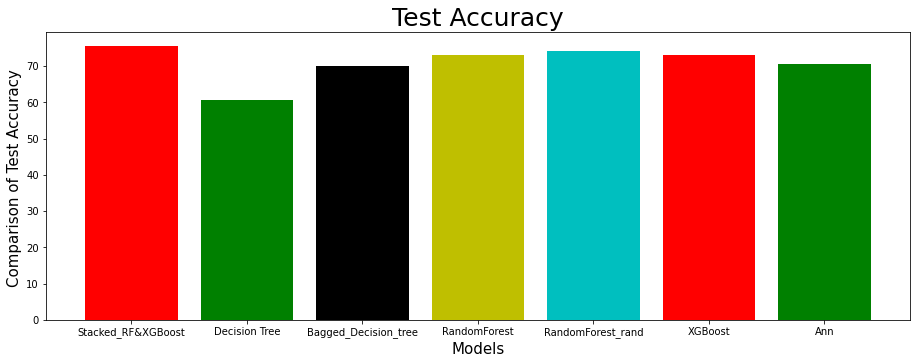

In [4]:
# Graph for Compairing Test Accuracy btw Different Machine Learnn Algorithms

import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([1.5,1,2,1
])#left,bootom ,width ,height                                                                                             #Add an axes to the figure.

Models = ['Stacked_RF&XGBoost','Decision Tree','Bagged_Decision_tree','RandomForest','RandomForest_rand','XGBoost','Ann']     #X AXIS
accuracy = [75.615,60.56,69.89,72.90,74.02,73,70.50]                         #Y AXIS
ax.bar(Models,accuracy,color='rgkyc')        #rgkyc-different color
plt.title("Test Accuracy",fontsize=25)    #title label
plt.xlabel("Models",fontsize=15)    #X label
plt.ylabel("Comparison of Test Accuracy ",fontsize=15)    #Y label
plt.show()    #Display a figure

### 6. Best Model with Highest R2 Score

<B>Stacked Random Forest Regressor & XG Boost Regressor: 75.615 ~ 76%</B>

#### Thank You!!